<a href="https://colab.research.google.com/github/EldarSB/mlops_practice/blob/master/lab5/mlops_practice_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Датасет 1

In [ ]:
x1 = np.linspace(0,20,200)
y1 = 2*x1 +np.random.random(200)*5-1

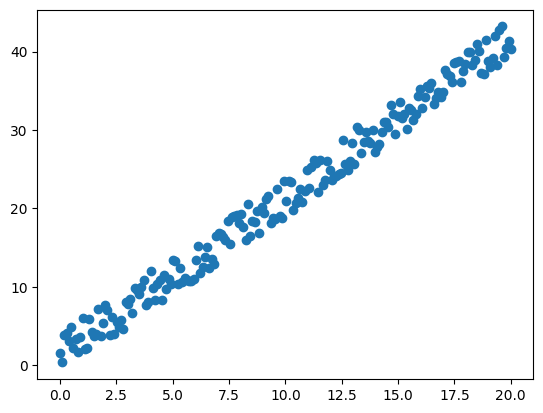

In [ ]:
plt.scatter(x1, y1)
plt.show()

#Датасет 2

In [ ]:
x2 = np.linspace(0,10,100)
y2 = x2 +np.random.random(100)*2

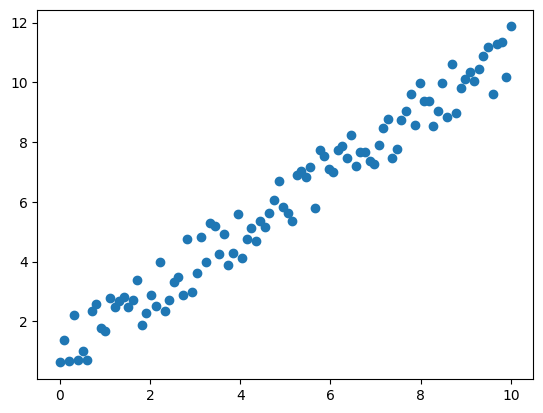

In [ ]:
plt.scatter(x2, y2)
plt.show()

#Датасет 3

In [ ]:
x3 = np.linspace(0,3,100)
y3 = 5*x3 +2*np.random.random(100)*2

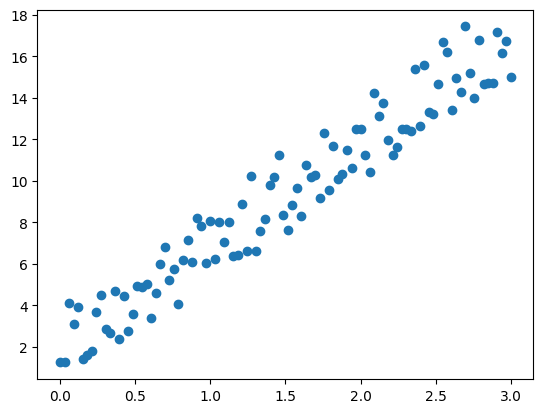

In [ ]:
plt.scatter(x3, y3)
plt.show()

#Модель линейной регресси

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
print(x1.shape)
print(y1.shape)

(200,)
(200,)


In [ ]:
X_train = x1.reshape(-1, 1)
Y_train = y1.reshape(-1, 1)

In [ ]:
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_m = lin_reg.fit(x_train_lin, y_train_lin)
lin_m

LinearRegression()

In [ ]:
import pickle

In [ ]:
with open('myfile.pkl', 'wb') as output:
    pickle.dump(lin_m, output)

In [ ]:
with open('myfile.pkl', 'rb') as f:
  data_new = pickle.load(f)

In [ ]:
result = data_new.score(x_test_lin, y_test_lin)
print(result)

0.9839506804735362


#Датасет с шумом

In [ ]:
x4 = np.linspace(0,15,100)
y4 = 2*x4 +np.random.random(100)*3-1
y4[25:55]*=2

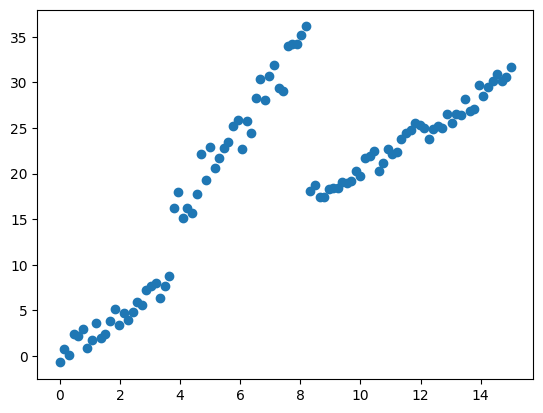

In [ ]:
plt.scatter(x4, y4)
plt.show()

#Тестирование работы модели

In [ ]:
import pytest

In [ ]:
%%writefile test.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def lin_m():
  with open('myfile.pkl', 'rb') as f:
    lin_m = pickle.load(f)
  return lin_m

def test3(lin_m):
  x3 = np.linspace(0,3,100)
  y3 = 5*x3 +2*np.random.random(100)*2
  pred3 = lin_m.predict(x3.reshape(-1,1))
  mse3 = mse(y3, pred3)
  r3= r2_score(y3, pred3)
  assert mse3 > 0
  assert r3 > -1

Overwriting test.py


In [ ]:
!cat test.py

import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def lin_m():
  with open('myfile.pkl', 'rb') as f:
    lin_m = pickle.load(f)
  return lin_m

def test3(lin_m):
  x3 = np.linspace(0,3,100)
  y3 = 5*x3 +2*np.random.random(100)*2
  pred3 = lin_m.predict(x3.reshape(-1,1))
  mse3 = mse(y3, pred3)
  r3= r2_score(y3, pred3)
  assert mse3 > 0
  assert r3 > -1


In [ ]:
!pytest -v test.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.0
collected 1 item                                                               

test.py::test3 PASSED                                                    [100%]

============================== 1 passed in 0.47s ===============================


In [ ]:
%%writefile test_lin.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def lin_m():
  with open('myfile.pkl', 'rb') as f:
    lin_m = pickle.load(f)
  return lin_m

def test3(lin_m):
  x4 = np.linspace(0,15,100)
  y4 = 2*x4 +np.random.random(100)*3-1
  y4[25:55]*=2
  pred4 = lin_m.predict(x4.reshape(-1,1))
  mse4 = mse(y4, pred4)
  r4= r2_score(y4, pred4)
  assert mse4 > 0
  assert r4 > -1

Overwriting test_lin.py


In [ ]:
!cat test_lin.py

import pytest
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import pickle
@pytest.fixture
def lin_m():
  with open('myfile.pkl', 'rb') as f:
    lin_m = pickle.load(f)
  return lin_m

def test3(lin_m):
  x4 = np.linspace(0,15,100)
  y4 = 2*x4 +np.random.random(100)*3-1
  y4[25:55]*=2
  pred4 = lin_m.predict(x4.reshape(-1,1))
  mse4 = mse(y4, pred4)
  r4= r2_score(y4, pred4)
  assert mse4 > 0
  assert r4 > -1


In [ ]:
!pytest -v test_lin.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.0
collected 1 item                                                               

test_lin.py::test3 PASSED                                                [100%]

============================== 1 passed in 0.47s ===============================


In [ ]:
pred4 = lin_reg.predict(x4.reshape(-1,1))
mse4 = mse(y4, pred4)
r4= r2_score(y4, pred4)
print(mse4)
print(r4)

46.88116363463082
0.5274765778704443
